<a href="https://colab.research.google.com/github/sriharirao16/sriharirao16/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Required libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import math 
#from scipy import stats
#from math import sqrt
def annot_plot(ax,w,h):                                    # function to add text to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))


In [4]:
#Import CSV File From Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Read csv file using pandas and store into dataframe
df = pd.read_csv('/content/drive/MyDrive/matches.csv')
df.head(10)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,player_of_match,venue
0,1,2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,KM Jadhav,M Chinnaswamy Stadium
5,6,2017,Hyderabad,9/4/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
6,7,2017,Mumbai,9/4/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,N Rana,Wankhede Stadium
7,8,2017,Indore,10/4/2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,AR Patel,Holkar Cricket Stadium
8,9,2017,Pune,11/4/2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,SV Samson,Maharashtra Cricket Association Stadium
9,10,2017,Mumbai,12/4/2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,JJ Bumrah,Wankhede Stadium


In [6]:
#change Date formate from string to date
df['date'] = pd.to_datetime(df['date'])
df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,player_of_match,venue
0,1,2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,KM Jadhav,M Chinnaswamy Stadium
5,6,2017,Hyderabad,2017-09-04,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
6,7,2017,Mumbai,2017-09-04,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,N Rana,Wankhede Stadium
7,8,2017,Indore,2017-10-04,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,AR Patel,Holkar Cricket Stadium
8,9,2017,Pune,2017-11-04,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,SV Samson,Maharashtra Cricket Association Stadium
9,10,2017,Mumbai,2017-12-04,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,JJ Bumrah,Wankhede Stadium


In [7]:
#Read csv file using pandas and store into dataframe2
df1 = pd.read_csv('/content/drive/MyDrive/deliveries.csv')
df1.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,4,4,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,0,0,2,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,1,1,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,4,4,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,1,0,1,NaN,NaN


# **Data** **Cleaning**

In [8]:
#Check the datatypes of each column
df.dtypes

id                          int64
season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
player_of_match            object
venue                      object
dtype: object

In [9]:
#Check the datatypes of each column in 2nd DataSet
df1.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
wide_runs            int64
noball_runs          int64
batsman_runs         int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
dtype: object

In [10]:
#Check the information of a Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  player_of_match  752 non-null    object        
 12  venue            756 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 76.9+ KB


In [11]:
#Check the information of a Dataframe 1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   wide_runs         179078 non-null  int64 
 10  noball_runs       179078 non-null  int64 
 11  batsman_runs      179078 non-null  int64 
 12  total_runs        179078 non-null  int64 
 13  player_dismissed  8834 non-null    object
 14  dismissal_kind    8834 non-null    object
dtypes: int64(8), object(7)
memory usage: 20.5+ MB


In [12]:
#Now display if the Null values are filled or not
df.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
player_of_match    4
venue              0
dtype: int64

In [13]:
#Store boolean values by checking the condition if the column has null values
city = pd.isnull(df['city'])
city

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Name: city, Length: 756, dtype: bool

In [14]:
#Retrieve only values which is null
city_df = df[city]
city_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,player_of_match,venue
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,B Kumar,Dubai International Cricket Stadium


In [15]:
#Fill all null values with 'Chennai' since only Chennai is not filled
df['city'].fillna("chennai", inplace = True)

#Now display if the values are filled or not
df.isna().sum()


id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
player_of_match    4
venue              0
dtype: int64

In [16]:
winner = pd.isnull(df['winner'])
winner

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Name: winner, Length: 756, dtype: bool

In [17]:
#Retrieve only values which is null
winner_df = df[winner]
winner_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,NaN,M. Chinnaswamy Stadium


In [18]:
#Fill all null values with 'No Result' since only No Result is not filled
df['winner'].fillna("No Result", inplace = True)

#Now display if the values are filled or not
df.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
player_of_match    4
venue              0
dtype: int64

In [19]:
player_of_match = pd.isnull(df['player_of_match'])
player_of_match

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Name: player_of_match, Length: 756, dtype: bool

In [20]:
#Retrieve only values which is null
player_of_match_df = df[player_of_match]
player_of_match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,No Result,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,No Result,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,No Result,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,No Result,NaN,M. Chinnaswamy Stadium


In [21]:
#Fill all null values with 'None' since only None is not filled
df['player_of_match'].fillna("None", inplace = True)

#Now display if the values are filled or not
df.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
player_of_match    0
venue              0
dtype: int64

In [22]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'chennai', 'Mohali', 'Bengaluru'], dtype=object)

In [23]:
#replace the City Name Bangalore to Bangaluru
df.replace('Bangalore','Bengaluru', inplace = True)
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'chennai', 'Mohali'], dtype=object)

In [24]:
#Now display if the values are filled or not
df1.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
wide_runs                0
noball_runs              0
batsman_runs             0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
dtype: int64

In [25]:
#Fill all null values with 'None' since only None is not filled
df1['player_dismissed'].fillna("None", inplace = True)

#Now display if the values are filled or not
df1.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
wide_runs                0
noball_runs              0
batsman_runs             0
total_runs               0
player_dismissed         0
dismissal_kind      170244
dtype: int64

In [26]:
#Fill all null values with 'None' since only None is not filled
df1['dismissal_kind'].fillna("None", inplace = True)

#Now display if the values are filled or not
df1.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
wide_runs           0
noball_runs         0
batsman_runs        0
total_runs          0
player_dismissed    0
dismissal_kind      0
dtype: int64

In [27]:
#List of Seasons
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [28]:
#List of the Participating Teams
all_teams = df['team1'].tolist() + df['team2'].tolist()
all_teams = list(set(all_teams))
all_teams

['Kings XI Punjab',
 'Pune Warriors',
 'Chennai Super Kings',
 'Delhi Capitals',
 'Kolkata Knight Riders',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Sunrisers Hyderabad']

In [29]:
#Check the number of rows in every column in Matches DataSet CSV File
df.count()

id                 756
season             756
city               756
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             756
player_of_match    756
venue              756
dtype: int64

In [30]:
#Check the number of rows in every column in Matches delivers CSV File
df1.count()

match_id            179078
inning              179078
batting_team        179078
bowling_team        179078
over                179078
ball                179078
batsman             179078
non_striker         179078
bowler              179078
wide_runs           179078
noball_runs         179078
batsman_runs        179078
total_runs          179078
player_dismissed    179078
dismissal_kind      179078
dtype: int64

# **Data** **Visualization**

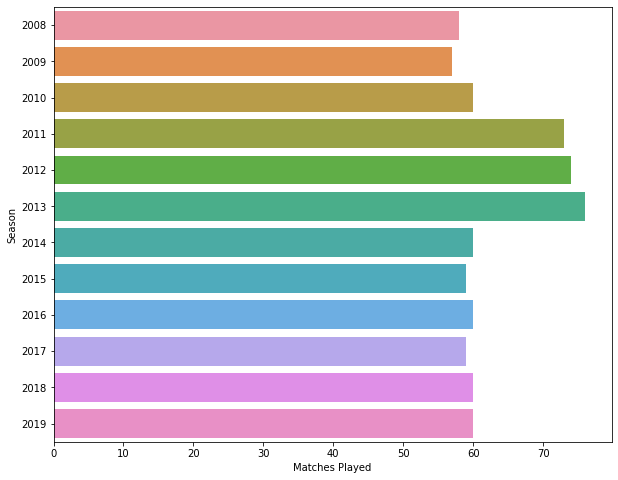

In [31]:
#We can find the number of matches played in each season 
plt.figure(figsize=(10,8))
data = df.groupby(['id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

In [32]:
#The analysis shows the IPL matches were played in venue
df.groupby(['venue','id']).count().droplevel(level=1).index.value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

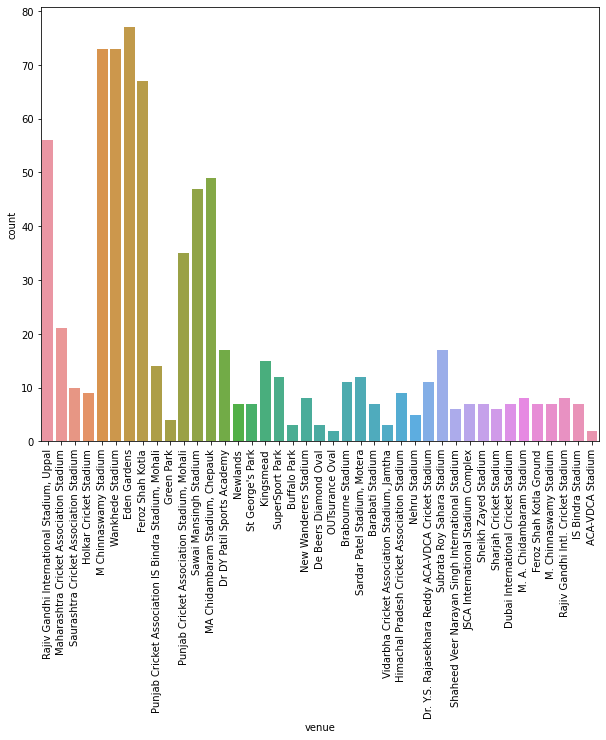

In [33]:
#Number of matches per venue
plt.figure(figsize=(10,8))
sns.countplot(x='venue', data=df)
plt.xticks(rotation='vertical')


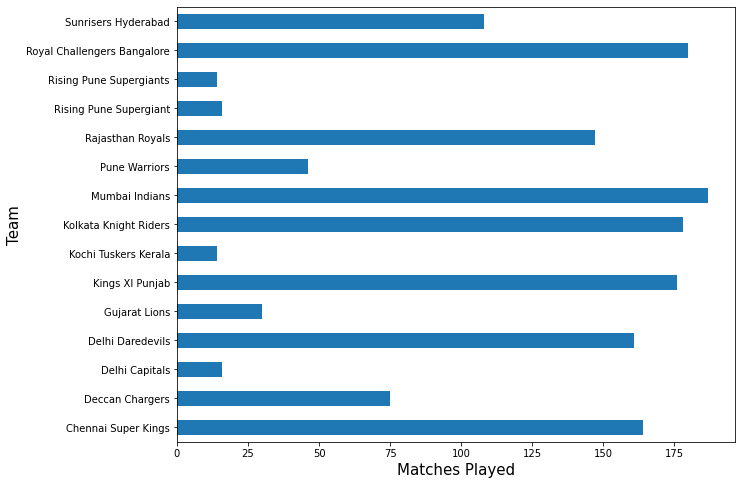

In [34]:
#IPL Matches Played by Each Team
plt.figure(figsize=(10,8))
x = df['team1'].value_counts()
y = df['team2'].value_counts()
(x+y).plot(kind='barh')
plt.xlabel('Matches Played',fontsize=15)
plt.ylabel('Team',fontsize=15)
plt.show()

In [35]:
#Match won by each team
x=pd.DataFrame({"winner":df['winner']}).value_counts()
print(x)

winner                     
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
No Result                        4
dtype: int64


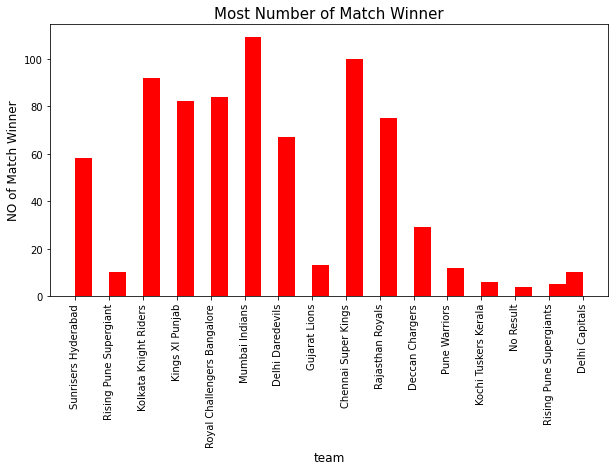

In [36]:
# Plot to visualise the Most No of Match Winner Team
plt.figure(figsize=(10,5))
plt.hist(df['winner'],color='red',bins=30)
plt.xticks(rotation=90)
plt.title('Most Number of Match Winner',fontsize=15)
plt.xlabel('team',fontsize=12)
plt.ylabel('NO of Match Winner',fontsize=12)
plt.show()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64


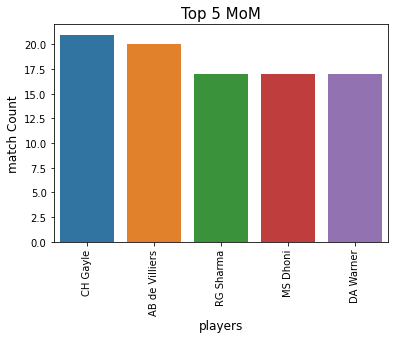

In [37]:
# Plot to visualise the top 5 players based on the no. of MOM awards won
data=df['player_of_match'].value_counts().head(5)
print(data)

sns.barplot(x=data.index,y=data.values,data=df)

plt.title("Top 5 MoM",fontsize=15)
plt.xticks(rotation=90)
plt.xlabel("players",fontsize=12)
plt.ylabel("match Count",fontsize=12)
plt.show()

In [38]:
#To Display the top 10 individual batsman Run Scored in whole Ipl season
df1.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)[:10]

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

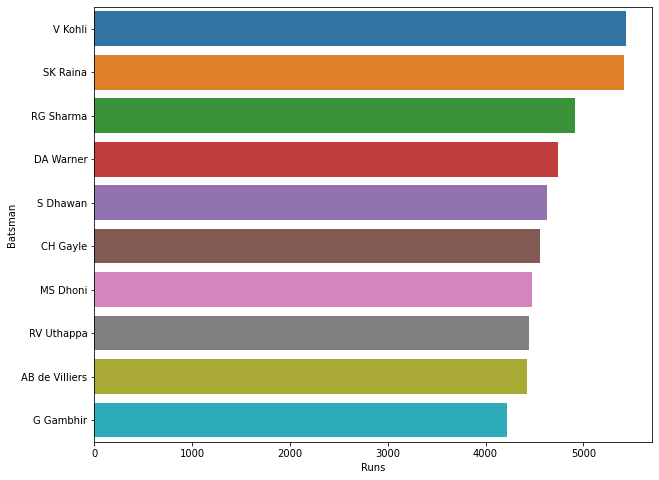

In [39]:
# Plot to visualize the Highest Run of the individual player
plt.figure(figsize=(10,8))
data = df1.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()

In [40]:
#To Display the top 10 individual bowler wicket Taken in whole Ipl season

lst = 'caught,bowled,lbw,stumped,caught and bowled,hit wicket'
df1[df1['dismissal_kind'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowler'].value_counts()[:10]

SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: bowler, dtype: int64

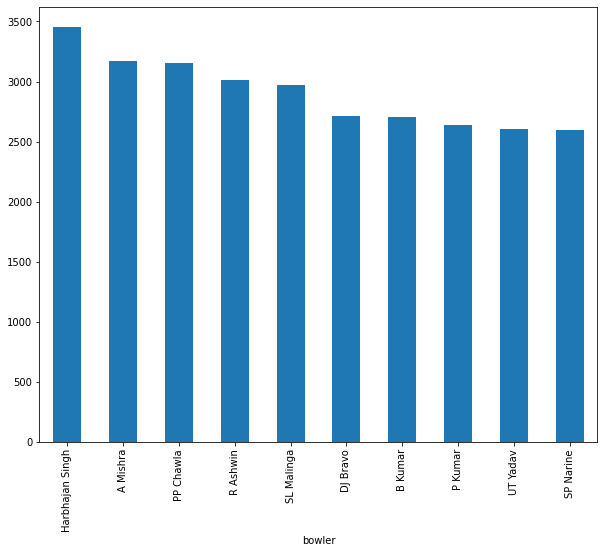

In [41]:
# Plot to visualize the Highest wicket Taken By Individual Bowler
plt.figure(figsize=(10,8))
df1.groupby('bowler')['player_dismissed'].agg('count').sort_values(ascending=False).head(10).plot(kind='bar')

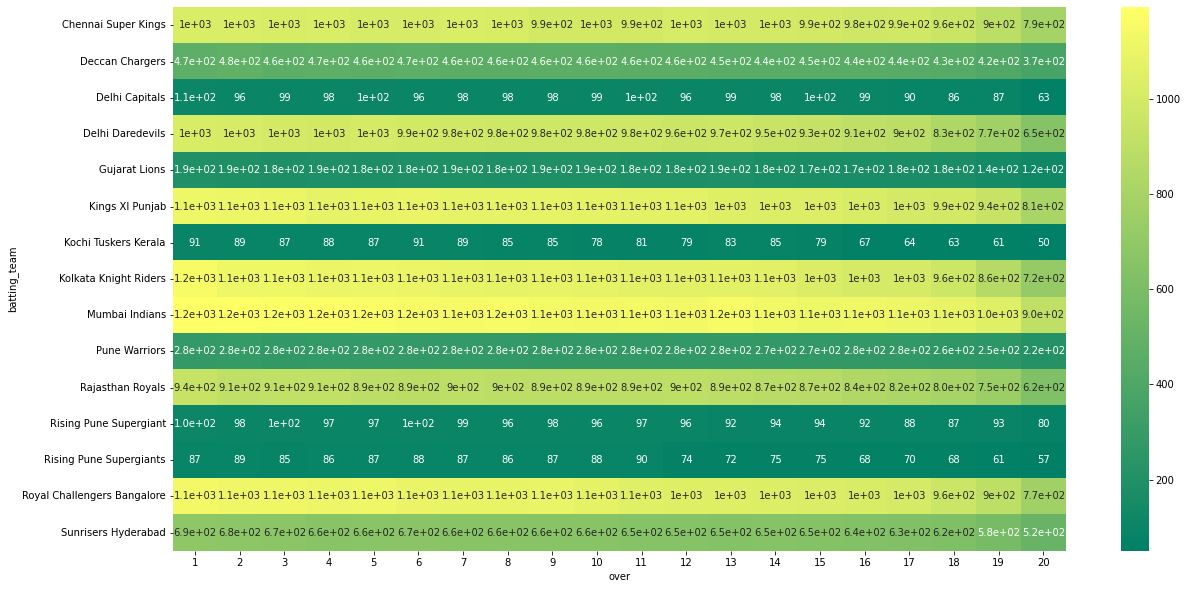

In [42]:
#we are using a pivot table and then count the over-wise run of batsmen of the batting team
plt.figure(figsize=(20,10))
delivery6=df1
delivery6=delivery6[['batting_team','over','batsman_runs']]
x=delivery6.pivot_table(values='batsman_runs', index='batting_team', columns='over', aggfunc='count')
sns.heatmap(x,cmap='summer',annot= True)

In [43]:
#Most IPL Century by a Player
runs = df1.groupby(['batsman','match_id'])['batsman_runs'].sum()
runs[runs >= 100].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:10]

batsman
CH Gayle          7
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
AC Gilchrist      2
AM Rahane         2
V Sehwag          2
BB McCullum       2
Name: batsman_runs, dtype: int64

In [44]:
#Most IPL Fifty by a Player
runs = df1.groupby(['batsman','match_id'])['batsman_runs'].sum()
runs[runs >= 50].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:10]

batsman
DA Warner         48
V Kohli           43
SK Raina          39
S Dhawan          37
RG Sharma         37
AB de Villiers    37
G Gambhir         36
CH Gayle          35
AM Rahane         29
RV Uthappa        24
Name: batsman_runs, dtype: int64

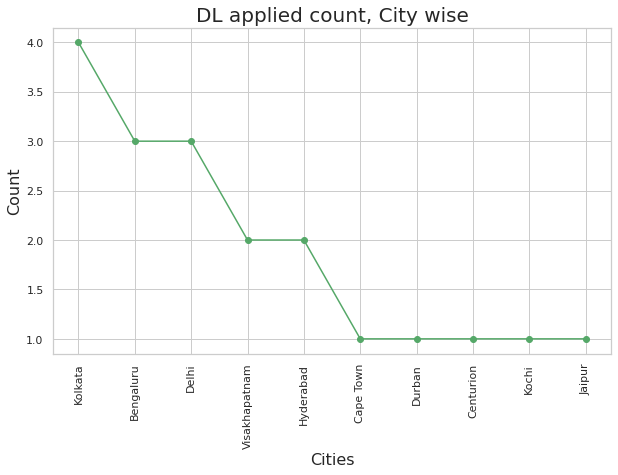

In [45]:
#dl Method
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax=df.city[df.dl_applied==1].value_counts()
plt.ylabel("Count",fontsize=16)
plt.title("DL applied count, City wise",fontsize=20)
plt.xlabel("Cities",fontsize=16)
plt.xticks(rotation=90)
plt.plot(ax,'g-o')
plt.show()
#Kolkata, Bangalore and Delhi is more likely to have bad weather.

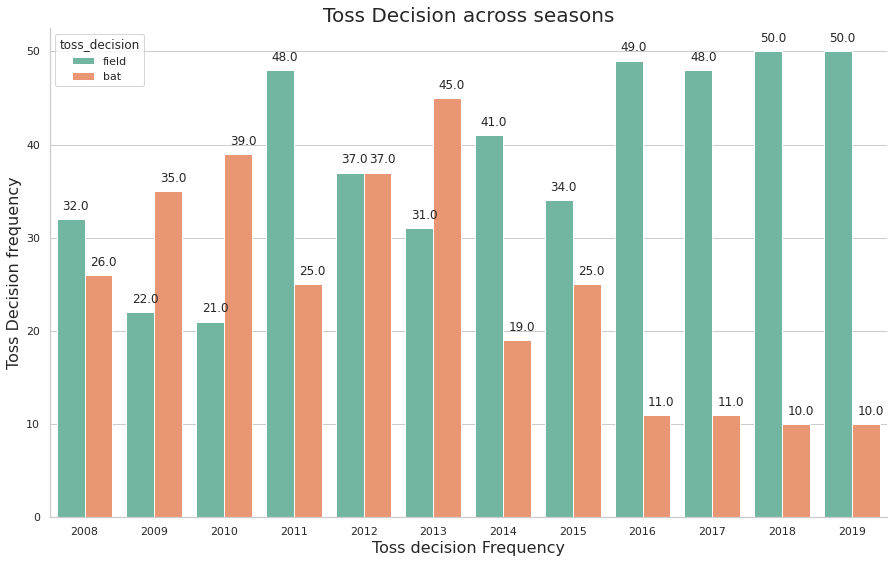

In [46]:
#4.18 Toss Decision across seasons
plt.figure(figsize=(15,9))
ax =sns.countplot(x='season',hue='toss_decision',data=df,palette="Set2")
plt.ylabel('Toss Decision frequency',fontsize=16)
plt.xlabel("Toss decision Frequency",fontsize=16)
plt.title('Toss Decision across seasons',fontsize=20)
annot_plot(ax,0.08,1)
plt.show()
#From the year 2014 most of the teams are opting to field after winning toss.

In [47]:
# Most Run Scored by IPL Teams
df1.groupby(['batsman','batting_team',])['batsman_runs'].sum().sort_values(ascending=False)[:10]

batsman         batting_team               
V Kohli         Royal Challengers Bangalore    5434
SK Raina        Chennai Super Kings            4574
MS Dhoni        Chennai Super Kings            3903
AB de Villiers  Royal Challengers Bangalore    3757
RG Sharma       Mumbai Indians                 3744
DA Warner       Sunrisers Hyderabad            3306
CH Gayle        Royal Challengers Bangalore    3175
G Gambhir       Kolkata Knight Riders          3035
AM Rahane       Rajasthan Royals               2840
KA Pollard      Mumbai Indians                 2784
Name: batsman_runs, dtype: int64

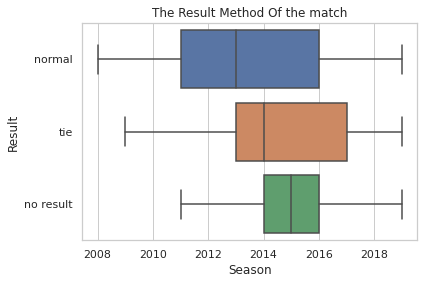

In [48]:
#To Visualize the Result Method of the Match
sns.boxplot(x=df['season'],y=df['result'])
plt.title('The Result Method Of the match')
plt.xlabel('Season',fontsize=12)
plt.ylabel('Result',fontsize=12)
plt.show()

In [49]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,player_of_match,venue
0,1,2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bengaluru,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,F du Plessis,ACA-VDCA Stadium


In [50]:
df1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,None,None
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,None,None
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,4,4,None,None
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,None,None
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,0,0,2,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,1,1,None,None
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,2,2,None,None
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,1,1,SR Watson,run out
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,2,2,None,None


In [51]:
df['id']

0          1
1          2
2          3
3          4
4          5
       ...  
751    11347
752    11412
753    11413
754    11414
755    11415
Name: id, Length: 756, dtype: int64

In [52]:
df1['match_id']

0             1
1             1
2             1
3             1
4             1
          ...  
179073    11415
179074    11415
179075    11415
179076    11415
179077    11415
Name: match_id, Length: 179078, dtype: int64

In [53]:
matches_played=pd.concat([df['team1'],df['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=df['winner'].value_counts().reset_index()['winner']
matches_played

,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Kings XI Punjab,176,84
4,Chennai Super Kings,164,82
5,Delhi Daredevils,161,75
6,Rajasthan Royals,147,67
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,13


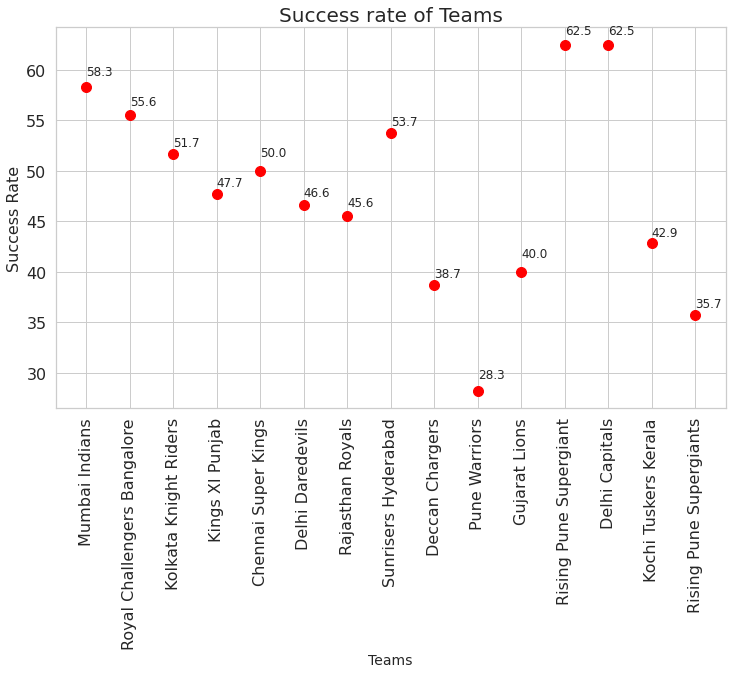

In [54]:
#Success rate of each team in Ipl from 2008-2019
plt.figure(figsize=(12,7))
x=matches_played['wins']
y=matches_played['Total Matches']
z=matches_played['Team']
percentage=(x/y)*100
plt.scatter(z,percentage,s=100,color='red')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Teams",fontsize=14)
plt.ylabel("Success Rate",fontsize=16)
plt.title("Success rate of Teams",fontsize=20)
count=0
for i in percentage:
    plt.text(count,int(i)+1.5,str(round(i,1)))
    count+=1
plt.show()
#success rate of mumbai indians and Chennai super kings is more than most of the teams but the number of matches 
#played by Delhi capitals are few so the their Success rate is high.

In [55]:
id = int(input('Enter the match id number: '))
df_id = df[df['id'] == id]
if df_id.empty:
  print("Enter the correct id")
else:
  i = df_id.index[0]
  team1 = df_id.loc[i,'team1']
  team2 = df_id.loc[i,'team2']
  winner = df_id.loc[i,'winner']
  print('Teams played: {0} and {1}'.format(team1,team2))
  df1_id = df1[df1['match_id'] == id]
  team1_df = df1_id[df1_id['inning'] == 1]
  team2_df = df1_id[df1_id['inning'] == 2]
  team1_total = team1_df['total_runs'].sum()
  team2_total = team2_df['total_runs'].sum()
  print("Total runs by {0} is : {1}".format(team1,team1_total))
  print("Total runs by {0} is : {1}".format(team2,team2_total))
  print('Winner was:',winner)

Enter the match id number: 88
Teams played: Kolkata Knight Riders and Royal Challengers Bangalore
Total runs by Kolkata Knight Riders is : 129
Total runs by Royal Challengers Bangalore is : 124
Winner was: Kolkata Knight Riders
